In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Library as lb
import tensorflow as tf
from tensorflow import keras

Training the model

In [35]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.01,    
  decay_steps=50,
  decay_rate=5,
  staircase=True)

def custom_loss(y_true, y_pred):
    return tf.keras.losses.cosine_similarity(y_true,y_pred) + 50*tf.keras.losses.huber(y_true,y_pred)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def get_callbacks(name):
    return [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1000, min_delta=0.0001),
        ]

def compile_and_fit(model, name, x_train, y_train, x_test, y_test, optimizer=None, max_epochs=1000):

    if optimizer is None:
        optimizer = get_optimizer()

    model.compile(optimizer=optimizer,
                loss=custom_loss,
                metrics=[
                  tf.keras.losses.MeanSquaredError("auto", "mean_squared_error")])


    model.summary()

    history = model.fit(
            x_train, y_train,
            epochs=max_epochs,
            validation_data=(x_test, y_test),
            callbacks=get_callbacks(name),
            verbose=2)

    return history

# Loading training dataset
folder = 'Burgers'
input_train=np.load('../data/' + folder + '/input_train.npy')
input_test=np.load('../data/' + folder + '/input_test.npy')
output_train=np.load('../data/' + folder + '/output_train.npy')
output_test=np.load('../data/' + folder + '/output_test.npy')

INPUTDIM = (input_train.shape[1],)
OUTPUTDIM = (output_train.shape[1],)

# Creting model
model = lb.FNO(INPUTDIM, OUTPUTDIM, p_dim=1024, n=6, k_max=5, verbose=True, model_name='Burgers_FNO', dropout=0.01, kernel_reg=0.0005)
history = compile_and_fit(model, model.name, x_train=input_train, y_train=output_train, x_test=input_test, y_test=output_test, optimizer=None, max_epochs=10000)



Creating Fourier Layer 0
fft_shape set: 5
ifft_shape set: 8
Bias layer has shape: 8
Creating Fourier Layer 1
fft_shape set: 5
ifft_shape set: 8
Bias layer has shape: 8
Creating Fourier Layer 2
fft_shape set: 5
ifft_shape set: 8
Bias layer has shape: 8
Creating Fourier Layer 3
fft_shape set: 5
ifft_shape set: 8
Bias layer has shape: 8
Creating Fourier Layer 4
fft_shape set: 5
ifft_shape set: 8
Bias layer has shape: 8
Creating Fourier Layer 5
fft_shape set: 5
ifft_shape set: 8
Bias layer has shape: 8
-------------------------------------------------------
Model: "Burgers_FNO"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 65)]              0         
                                                                 
 P_layer (Dense)             (None, 1024)              67584     
                                                                 
 dropout_20 (Dropout)  

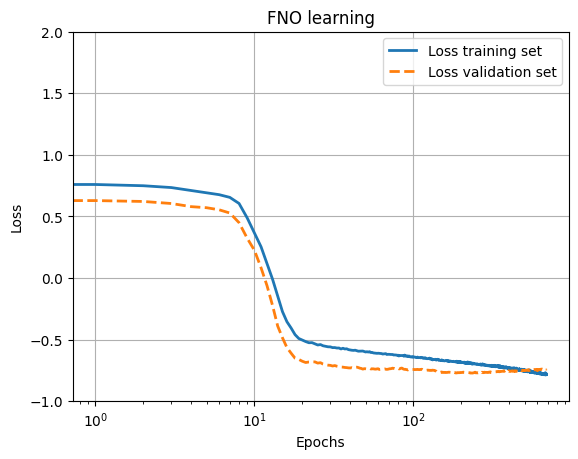

In [24]:
bc     = history.history['loss']
val_bc = history.history['val_loss']

plt.semilogx(range(np.shape(bc)[0]),bc, linewidth=2,)
plt.semilogx(range(np.shape(val_bc)[0]),val_bc,'--', linewidth=2,)
plt.title('FNO learning')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([-1,2])
plt.legend(('Loss training set','Loss validation set'))
plt.savefig('../Burgers_FNO.png', dpi=300)
plt.show()

22/22 [==============================] - 0s 5ms/step


Text(0.5, 0, 'x [-]')

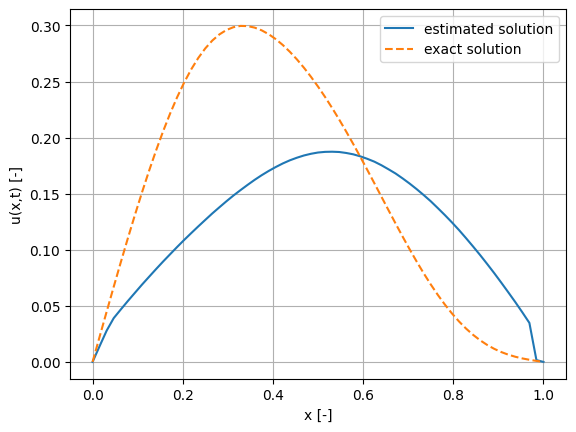

In [40]:
rec_output = model.predict(input_test)
index = 198
xx=np.linspace(0,1,rec_output.shape[1])

plt.figure()
plt.grid(True)
plt.plot(xx,rec_output[index,:], label='estimated solution')
plt.plot(xx,output_test[index,:], label='exact solution', linestyle='--')
#plt.plot(xx,input_train[index,:], label='input', linestyle='--')
plt.legend()
plt.ylabel('u(x,t) [-]')
plt.xlabel('x [-]')

In [156]:
save_NN = False
# save_NN = True
if save_NN:
    model.save('../data/'+folder+'/Burgers_FNO.h5')
    print('FNO saved in '+str(folder))
else:
    print('FNO not saved')

FNO saved in Burgers


Loading the model

In [3]:
folder = 'Burgers'
loaded_model = keras.models.load_model('../data/'+folder+'/Burgers_FNO.h5', compile=False)

fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12


In [4]:
input_test=np.load('../data/' + folder + '/input_test.npy')
output_test=np.load('../data/' + folder + '/output_test.npy')
input_train=np.load('../data/' + folder + '/input_train.npy')
output_train=np.load('../data/' + folder + '/output_train.npy')

22/22 [==============================] - 0s 5ms/step


Text(0.5, 1.0, 'Test set - index: 329')

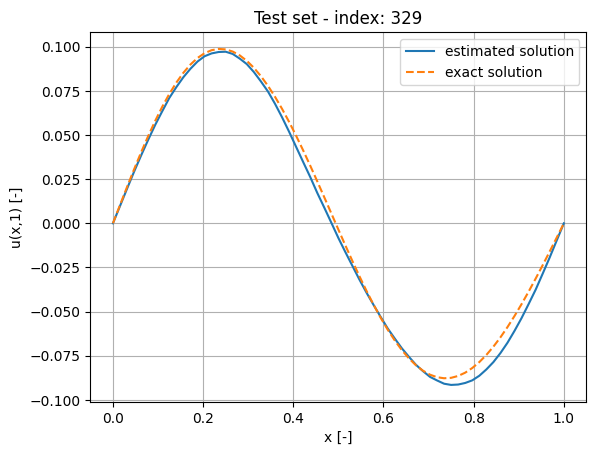

In [14]:
from random import randint
rec_output = loaded_model.predict(input_test)
index = randint(0, input_test.shape[0]-1)
xx=np.linspace(0,1,rec_output.shape[1])

plt.figure()
plt.grid(True)
plt.plot(xx,rec_output[index,:], label='estimated solution')
plt.plot(xx,output_test[index,:], label='exact solution', linestyle='--')
plt.legend()
plt.ylabel('u(x,1) [-]')
plt.xlabel('x [-]')
plt.title('Test set - index: '+ str(index))
# plt.savefig('../Burgers_test_'+str(index)+'.png', dpi=300)